In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/customer_churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.drop('customerID', axis = 1, inplace = True)

In [5]:
data.shape

(7043, 20)

In [6]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.duplicated().sum()

22

In [8]:
data.drop_duplicates(inplace = True)

In [9]:
data.shape

(7021, 20)

In [10]:
Customer_5 = data[data.index == 4]

In [11]:
Customer_15 = data[data.index == 14]

In [12]:
senior_male_electronic = data[(data['gender']=='Male') & (data['SeniorCitizen'] == 1) & (data['PaymentMethod'] == 'Electronic check')]

In [13]:
data['PaymentMethod'].value_counts()

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [14]:
customer_total_tenure = data[(data['tenure']>70) | (data['MonthlyCharges']>100)]

In [15]:
two_mail_yes = data[(data['Contract']=='Two year') & (data['Churn'] == 'Yes') & (data['PaymentMethod'] == 'Mailed check')]

In [24]:
customer_333 = data.sample(333)

In [26]:
data.Churn.value_counts()

No     5164
Yes    1857
Name: Churn, dtype: int64

In [36]:
internet_service = data['InternetService'].value_counts()

Text(0.5, 1.0, 'Distribution of Internet Service')

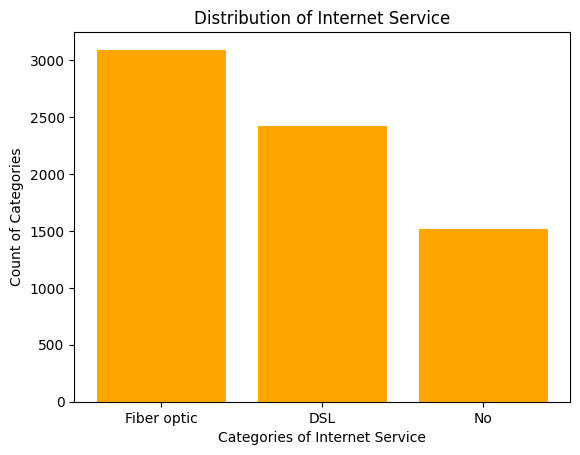

In [38]:
plt.bar(internet_service.index,internet_service.values, color = 'orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

In [39]:
data['tenure'].value_counts()

1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

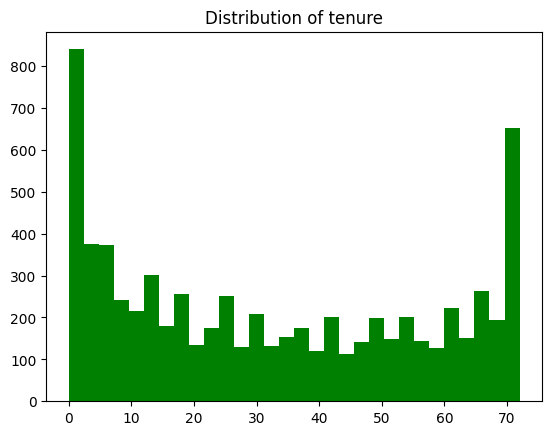

In [41]:
plt.hist(data['tenure'],bins = 30, color = 'green')
plt.title('Distribution of tenure')
plt.show()

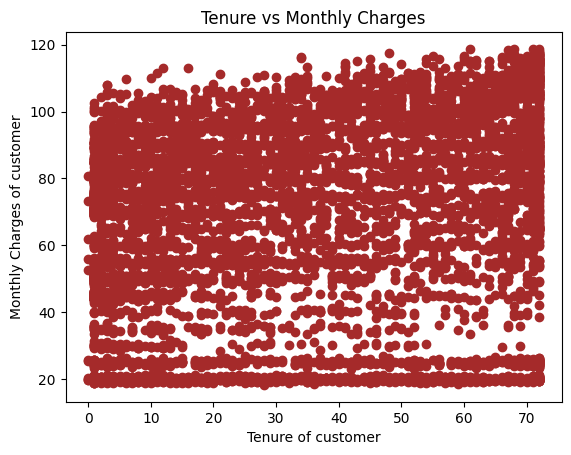

In [51]:
plt.scatter(data['tenure'],data['MonthlyCharges'],c = 'brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

<Axes: xlabel='Contract', ylabel='tenure'>

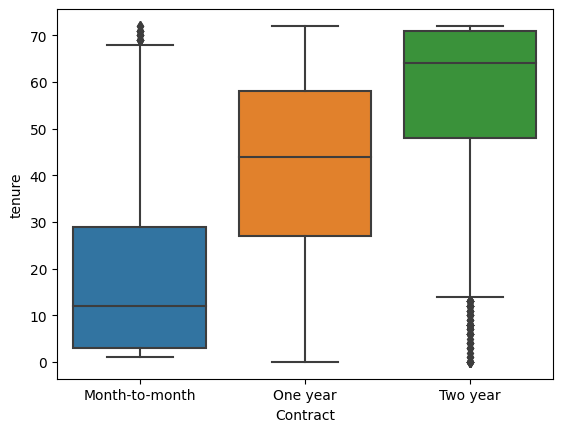

In [50]:
sns.boxplot(x = data['Contract'],y = data['tenure'])

In [52]:
x = data['tenure']
y = data['MonthlyCharges']

In [53]:
from sklearn.model_selection import train_test_split

In [108]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [109]:
xtrain = xtrain.values.reshape(-1,1)
xtest = xtest.values.reshape(-1,1)
xtrain.shape,xtest.shape

((4914, 1), (2107, 1))

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
lr = LinearRegression()

In [112]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [113]:
ypred_linr = lr.predict(xtest)

In [114]:
from sklearn.metrics import mean_squared_error

In [115]:
error = mean_squared_error(ytest,ypred_linr,squared = False)
error

28.87790078701671

In [116]:
x = data['MonthlyCharges']
y = data['Churn']

In [129]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.35, random_state = 42)

In [130]:
xtrain = xtrain.values.reshape(-1,1)
xtest = xtest.values.reshape(-1,1)

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
lr = LogisticRegression()

In [133]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [134]:
ypred_lr = lr.predict(xtest)

In [135]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [147]:
cm = confusion_matrix(ytest,ypred_lr)
cm

array([[1808,    0],
       [ 650,    0]])

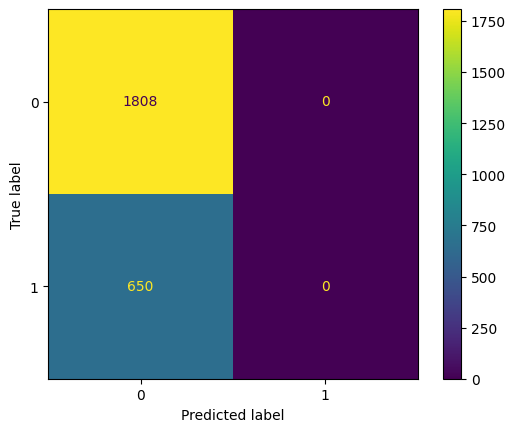

In [148]:
ConfusionMatrixDisplay(cm).plot()

In [163]:
accuracy = ((cm[0:1,:1]+cm[1:,1:])/np.sum(cm))
accuracy

array([[0.73555736]])

In [166]:
x = data[['tenure','MonthlyCharges']]
y = data['Churn']

In [167]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [168]:
lr = LogisticRegression()

In [169]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [170]:
ypred_lr = lr.predict(xtest)

In [171]:
cm = confusion_matrix(ytest,ypred_lr)
cm

array([[950, 103],
       [186, 166]])

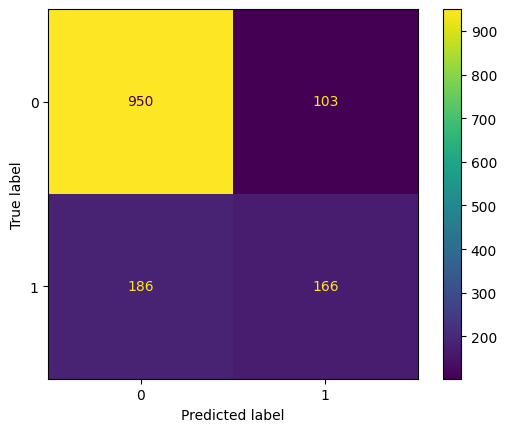

In [172]:
ConfusionMatrixDisplay(cm).plot()

In [173]:
accuracy = ((cm[0:1,:1]+cm[1:,1:])/np.sum(cm))
accuracy

array([[0.79430605]])

In [174]:
x = data['tenure']
y = data['Churn']

In [175]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [176]:
xtrain = xtrain.values.reshape(-1,1)
xtest = xtest.values.reshape(-1,1)

In [177]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
dt = DecisionTreeClassifier()

In [179]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [181]:
ypred_dt = dt.predict(xtest)

In [182]:
cm = confusion_matrix(ytest,ypred_dt)
cm

array([[970,  83],
       [258,  94]])

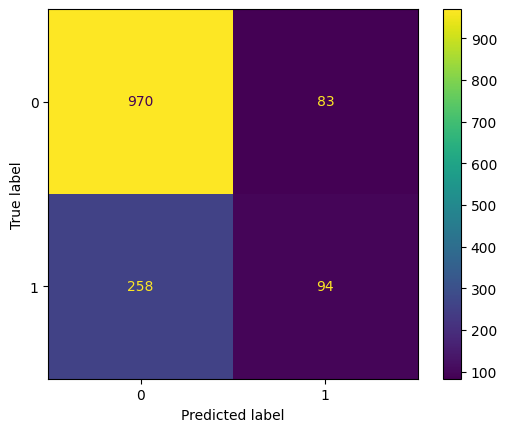

In [183]:
ConfusionMatrixDisplay(cm).plot()

In [186]:
accuracy = ((cm[0:1,:1]+cm[1:,1:])/np.sum(cm))
accuracy

array([[0.75729537]])

In [187]:
x = data[['tenure','MonthlyCharges']]
y = data['Churn']

In [189]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
rf = RandomForestClassifier()

In [192]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [193]:
ypred_rf = rf.predict(xtest)

In [195]:
cm = confusion_matrix(ytest,ypred_rf)
cm

array([[1319,  237],
       [ 294,  257]])

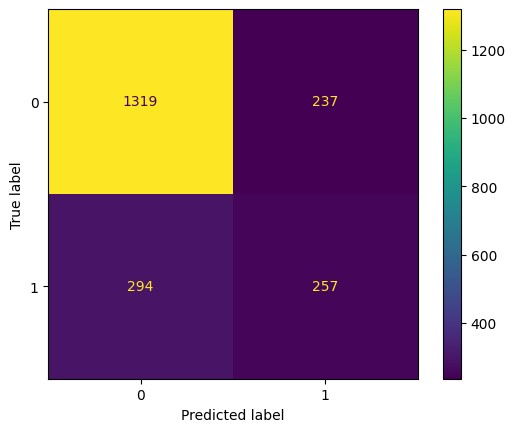

In [196]:
ConfusionMatrixDisplay(cm).plot()

In [197]:
accuracy = ((cm[0:1,:1]+cm[1:,1:])/np.sum(cm))
accuracy

array([[0.74798291]])